# 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

# 2. Load Data

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3. Exploratory Data Analysis

# Shape of Data

In [3]:
shape = df.shape
print('Data Set contains', shape[0], 'rows and', shape[1], 'columns')

Data Set contains 1599 rows and 12 columns


# Getting describption of the data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Univariant Analysis

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


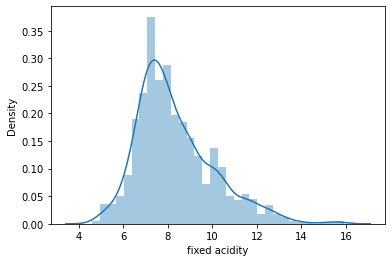

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


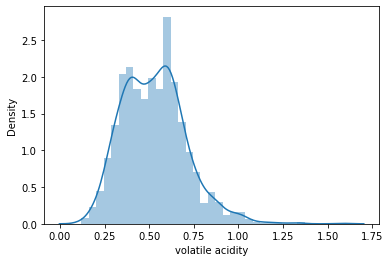

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


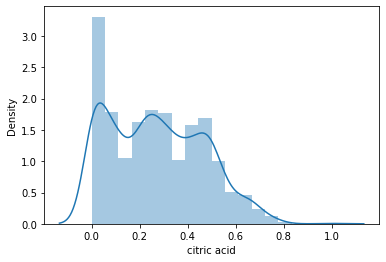

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


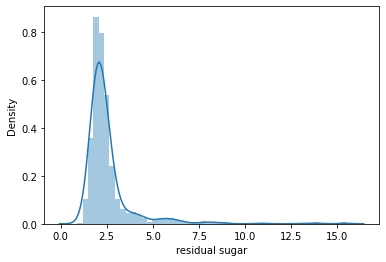

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


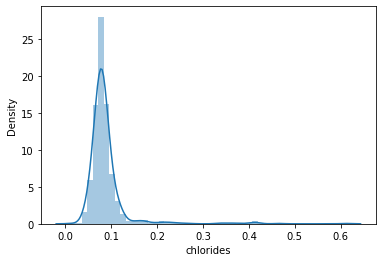

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


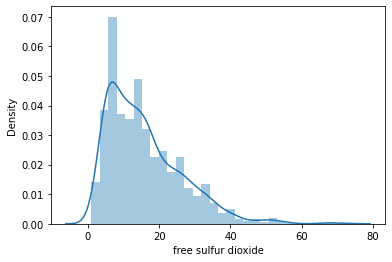

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


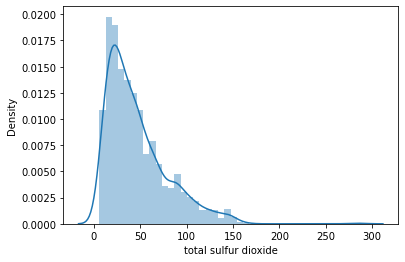

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


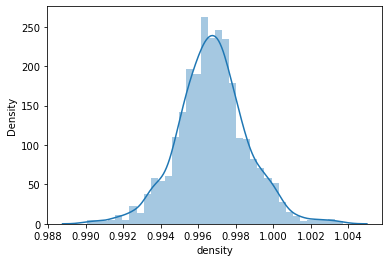

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


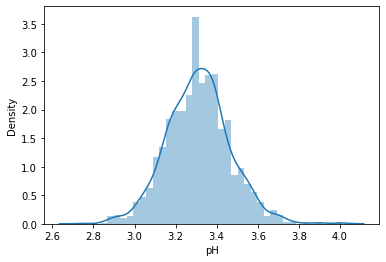

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


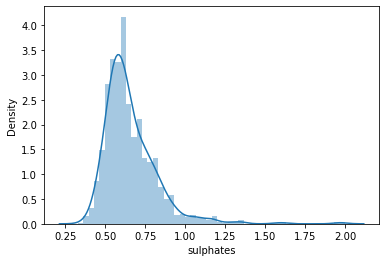

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


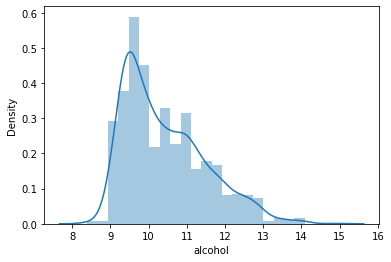

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


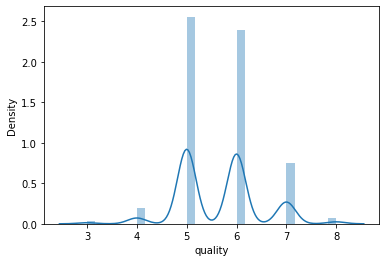

In [5]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.distplot(frame[i])
            plt.show()
                
        elif(frame[i].dtype == 'float64'):
            sns.distplot(frame[i])
            plt.show()
            
univariant(df)

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

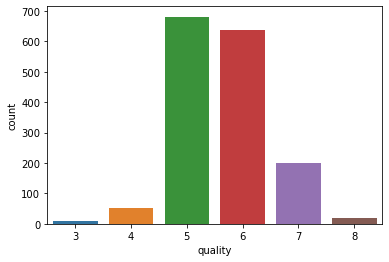

In [6]:
sns.countplot(df['quality'])

As we see above that 3, 4, 7 & 8 have less data and 5 & 6 contains most data. So, i decided to divide them into 2 categories High and low. I will put 3,4,&5 in low quality and 6,7&8 in high quality

# Biavarient Analysis

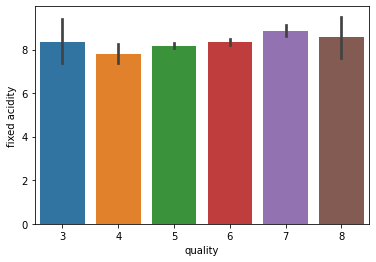

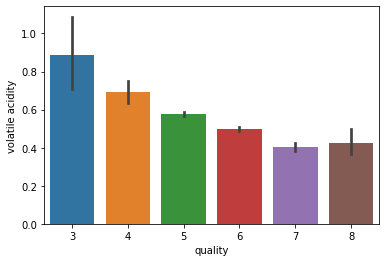

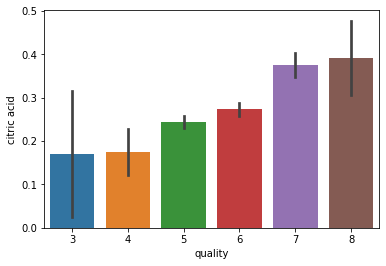

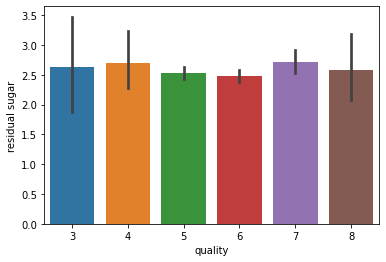

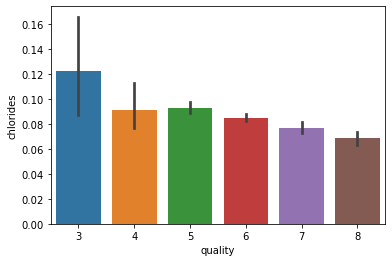

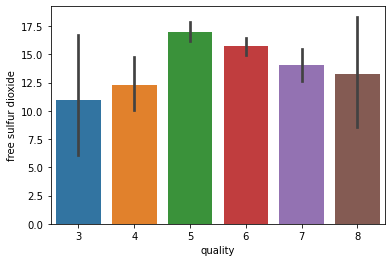

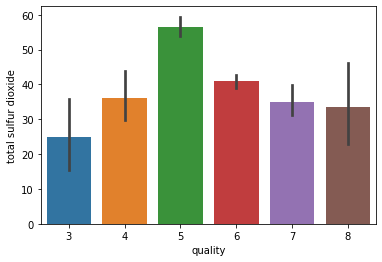

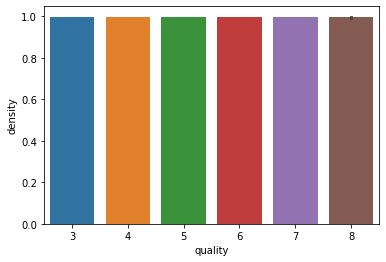

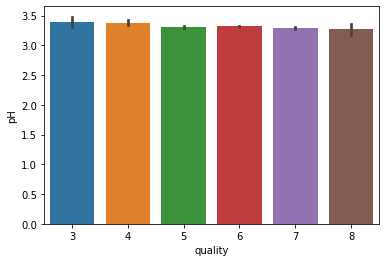

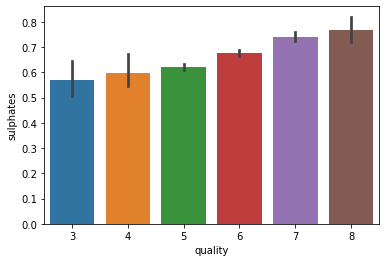

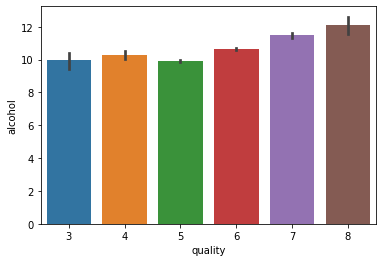

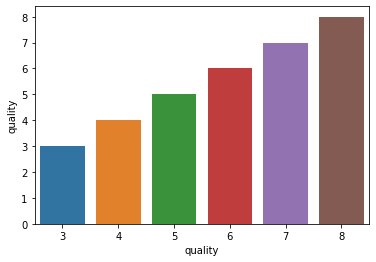

In [7]:
def bivariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.barplot(x = df['quality'], y = frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.barplot(x = df['quality'], y = frame[i])
            plt.show()
            
bivariant(df)

# Detecting Outliers

fixed acidity
[ 4.6    5.2    5.6    5.8    6.     6.1    6.2    6.3    6.4    6.4
  6.5    6.6    6.6    6.7    6.7    6.8    6.8    6.8    6.9    6.9
  7.     7.     7.     7.1    7.1    7.1    7.1    7.2    7.2    7.2
  7.2    7.3    7.3    7.3    7.4    7.4    7.5    7.5    7.5    7.5
  7.6    7.6    7.616  7.7    7.7    7.7    7.8    7.8    7.8    7.9
  7.9    7.9    8.     8.     8.1    8.1    8.2    8.2    8.2    8.3
  8.3    8.4    8.4    8.5    8.6    8.6    8.7    8.8    8.8    8.9
  8.9    9.     9.     9.1    9.1    9.2    9.3    9.4    9.5    9.6
  9.7    9.8    9.9   10.    10.    10.2   10.228 10.4   10.424 10.6
 10.7   10.9   11.1   11.4   11.512 11.8   12.    12.4   12.7   13.3
 15.9  ]


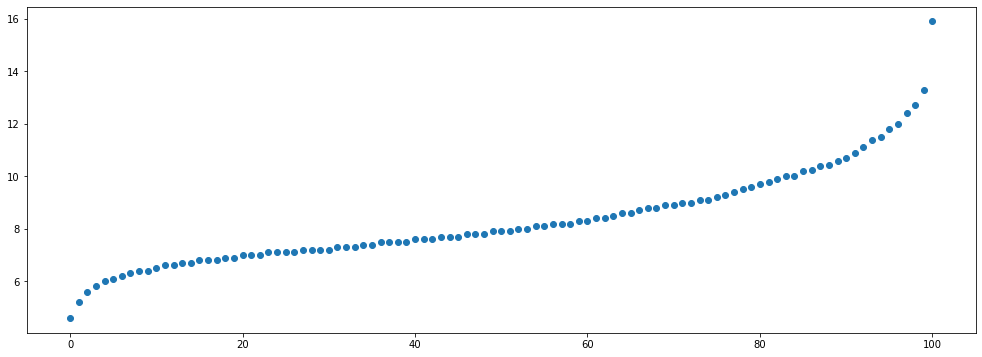

volatile acidity
[0.12   0.19   0.2296 0.24   0.26   0.27   0.28   0.29   0.3    0.305
 0.31   0.315  0.32   0.33   0.34   0.34   0.35   0.3566 0.36   0.36
 0.37   0.3758 0.38   0.38   0.39   0.39   0.4    0.4    0.41   0.41
 0.415  0.42   0.4236 0.43   0.43   0.44   0.44   0.45   0.46   0.46
 0.47   0.48   0.48   0.49   0.49   0.5    0.5    0.5    0.51   0.52
 0.52   0.52   0.53   0.54   0.54   0.545  0.55   0.56   0.56   0.57
 0.57   0.58   0.58   0.585  0.59   0.59   0.6    0.6    0.6    0.61
 0.61   0.62   0.62   0.63   0.63   0.64   0.64   0.645  0.65   0.66
 0.66   0.67   0.675  0.685  0.69   0.6915 0.7    0.715  0.725  0.735
 0.745  0.7609 0.78   0.785  0.82   0.84   0.87   0.9    0.96   1.02
 1.58  ]


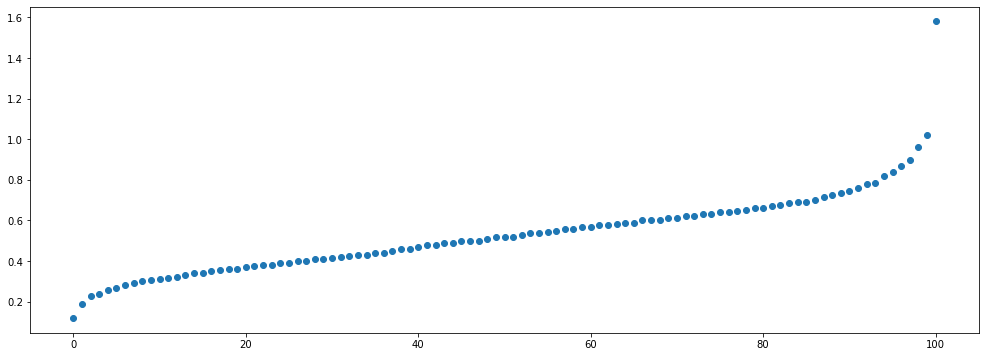

citric acid
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.01
 0.01   0.02   0.02   0.02   0.03   0.03   0.04   0.04   0.05   0.06
 0.07   0.07   0.08   0.08   0.09   0.09   0.1    0.1    0.11   0.12
 0.124  0.13   0.14   0.15   0.16   0.17   0.18   0.19   0.2    0.2
 0.21   0.21   0.22   0.22   0.23   0.24   0.24   0.24   0.25   0.25
 0.26   0.26   0.26   0.27   0.28   0.29   0.3    0.3    0.31   0.31
 0.32   0.32   0.33   0.33   0.34   0.35   0.36   0.37   0.38   0.39
 0.39   0.4    0.4    0.41   0.42   0.42   0.43   0.44   0.45   0.46
 0.46   0.47   0.48   0.49   0.49   0.49   0.49   0.5    0.5    0.52
 0.522  0.54   0.55   0.57   0.58   0.6    0.64   0.66   0.68   0.7002
 1.    ]


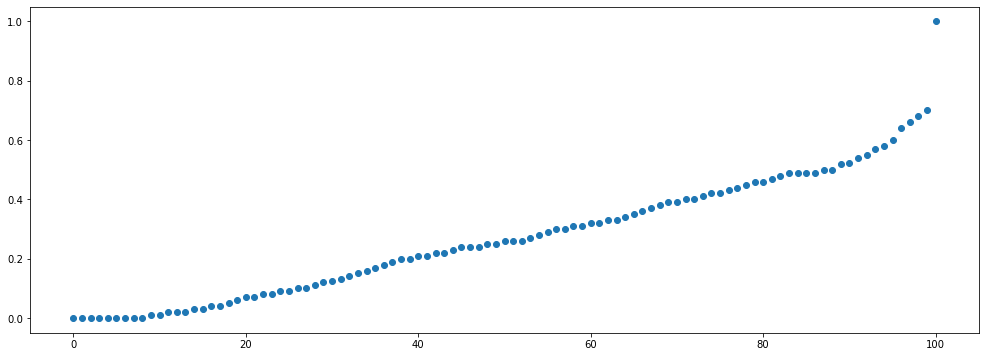

residual sugar
[ 0.9    1.4    1.4    1.4    1.5    1.59   1.6    1.6    1.6    1.7
  1.7    1.7    1.7    1.7    1.8    1.8    1.8    1.8    1.8    1.8
  1.8    1.8    1.9    1.9    1.9    1.9    1.9    1.9    1.9    1.942
  2.     2.     2.     2.     2.     2.     2.     2.     2.     2.1
  2.1    2.1    2.1    2.1    2.1    2.1    2.1    2.153  2.2    2.2
  2.2    2.2    2.2    2.2    2.2    2.2    2.3    2.3    2.3    2.3
  2.3    2.3    2.3    2.4    2.4    2.4    2.4    2.4    2.5    2.5
  2.5    2.5    2.5    2.6    2.6    2.6    2.6    2.6    2.7    2.7
  2.7    2.8    2.8    2.8    2.9    2.965  3.     3.126  3.3    3.4
  3.6    3.8    4.     4.3    4.6    5.1    5.6    6.006  6.604  8.306
 15.5  ]


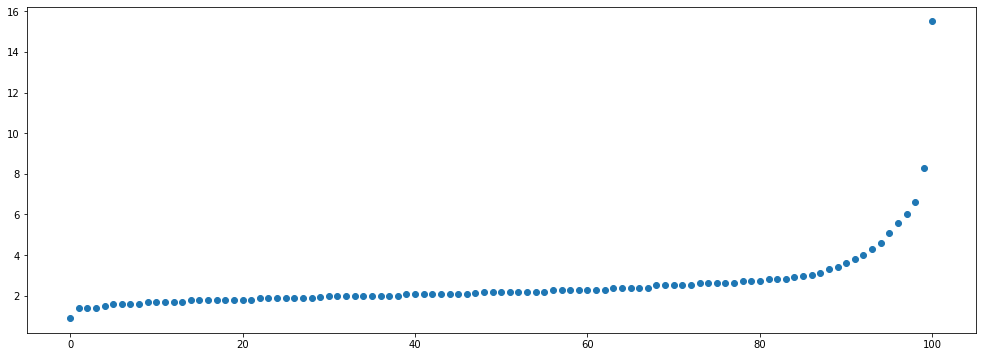

chlorides
[0.012   0.04298 0.047   0.049   0.052   0.054   0.055   0.057   0.058
 0.059   0.06    0.06178 0.062   0.063   0.064   0.064   0.065   0.066
 0.066   0.067   0.067   0.068   0.068   0.069   0.07    0.07    0.071
 0.071   0.071   0.072   0.072   0.073   0.073   0.074   0.074   0.074
 0.075   0.075   0.075   0.076   0.076   0.076   0.077   0.077   0.077
 0.078   0.078   0.078   0.079   0.079   0.079   0.08    0.08    0.08
 0.08    0.081   0.081   0.081   0.082   0.082   0.082   0.083   0.083
 0.084   0.084   0.084   0.085   0.086   0.086   0.087   0.087   0.088
 0.088   0.089   0.09    0.09    0.091   0.092   0.093   0.093   0.094
 0.095   0.096   0.097   0.09732 0.099   0.1     0.10226 0.104   0.106
 0.109   0.111   0.114   0.118   0.122   0.1261  0.15332 0.17412 0.226
 0.36016 0.611  ]


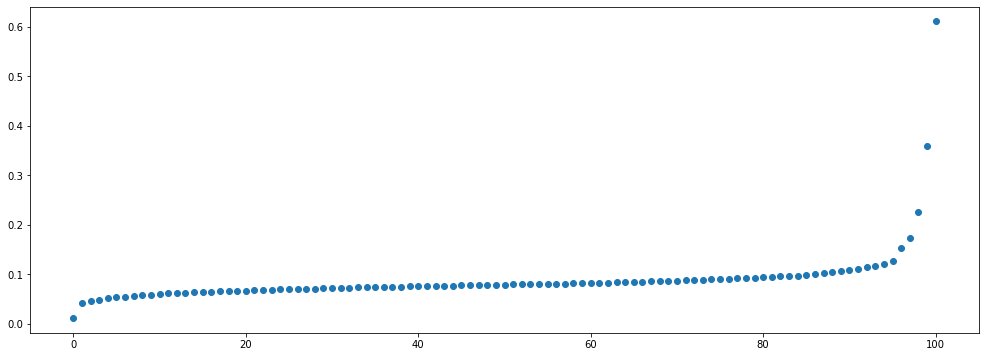

free sulfur dioxide
[ 1.    3.    3.    3.    4.    4.    5.    5.    5.    5.    5.    5.
  5.    6.    6.    6.    6.    6.    6.    6.    6.    6.    7.    7.
  7.    7.    8.    8.    8.    8.42  9.    9.    9.   10.   10.   10.
 10.   10.   11.   11.   11.   11.   12.   12.   12.   12.   12.   13.
 13.   13.   14.   14.   14.   15.   15.   15.   15.   15.   16.   16.
 16.   16.   17.   17.   17.   17.   18.   18.   18.   19.   19.   20.
 20.   21.   21.   21.   22.   23.   23.   24.   24.   25.   25.   26.
 26.   27.   28.   28.   29.   30.   31.   31.   32.   33.   34.   35.
 37.   39.   42.   50.02 72.  ]


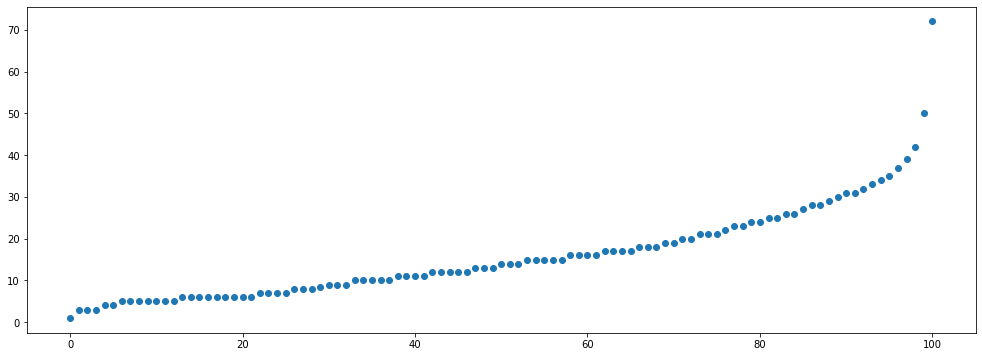

total sulfur dioxide
[  6.     8.     9.    10.    11.    11.    12.    12.    13.    13.
  14.    14.    15.    15.    16.    17.    17.    18.    18.    19.
  19.    20.    20.    21.    21.    22.    23.    23.    24.    24.
  24.    25.    26.    26.    27.    27.    28.    28.    29.    29.
  30.    31.    31.    32.    33.    34.    35.    35.    36.04  37.
  38.    38.    39.    40.    41.    42.    42.    43.    44.    45.
  45.8   46.    47.    48.    49.    49.    51.    52.    53.    54.
  55.    56.    58.    60.    60.52  62.    64.    65.    66.    68.
  69.    71.38  73.    76.    79.    82.    85.    87.    88.    91.
  93.2   96.   100.   104.   108.12 112.1  119.08 127.   135.   145.
 289.  ]


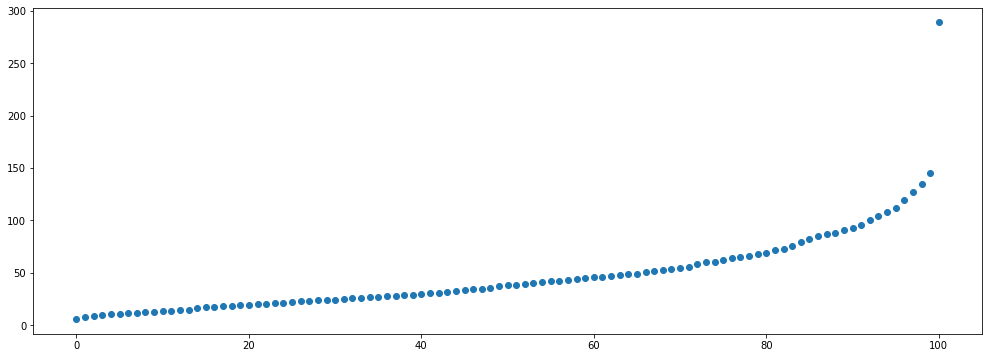

density
[0.99007   0.99182   0.99258   0.9932188 0.99346   0.993598  0.99378
 0.9939686 0.99418   0.99438   0.994556  0.99467   0.9947552 0.9948374
 0.9949172 0.995     0.99508   0.99516   0.9952    0.9952724 0.99534
 0.9954    0.99546   0.9955    0.9955452 0.9956    0.9956548 0.99572
 0.99576   0.9958    0.99586   0.9959    0.9959672 0.996     0.9961
 0.99613   0.9961628 0.9962    0.99622   0.99628   0.9963    0.9963518
 0.9964    0.9964    0.99648   0.99652   0.99656   0.9966    0.9966504
 0.9967    0.99675   0.9968    0.9968    0.99683   0.99689   0.9969
 0.9969788 0.997     0.9970368 0.9971    0.997156  0.9972    0.9972
 0.99724   0.9973    0.99734   0.99738   0.9974    0.99745   0.99748
 0.9976    0.9976    0.9976268 0.99774   0.9978    0.997835  0.9979
 0.998     0.998     0.9980884 0.998174  0.9982    0.99828   0.9984
 0.9984    0.9986    0.9986112 0.9987852 0.9988    0.999     0.99914
 0.999309  0.9994    0.9996    0.9997    1.        1.0001224 1.000306
 1.0008    1.001506  1.0

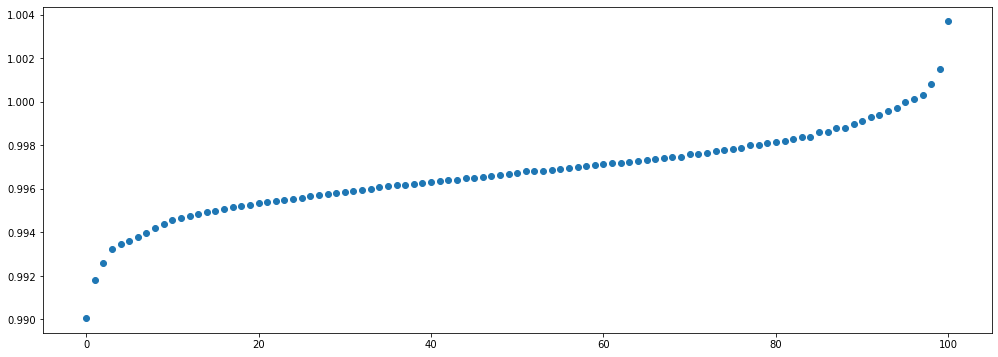

pH
[2.74   2.93   3.     3.0294 3.0492 3.06   3.08   3.09   3.1    3.12
 3.12   3.1378 3.14   3.15   3.15   3.16   3.16   3.17   3.17   3.18
 3.18   3.19   3.2    3.2    3.2    3.21   3.21   3.22   3.22   3.23
 3.23   3.24   3.24   3.25   3.25   3.26   3.26   3.26   3.27   3.27
 3.28   3.28   3.28   3.29   3.29   3.29   3.3    3.3    3.3    3.31
 3.31   3.31   3.32   3.32   3.32   3.33   3.33   3.34   3.34   3.34
 3.35   3.35   3.36   3.36   3.36   3.36   3.37   3.37   3.38   3.38
 3.38   3.39   3.39   3.39   3.4    3.4    3.41   3.41   3.42   3.42
 3.424  3.43   3.44   3.45   3.45   3.46   3.47   3.48   3.4824 3.5
 3.51   3.52   3.53   3.54   3.55   3.57   3.58   3.6006 3.66   3.7002
 4.01  ]


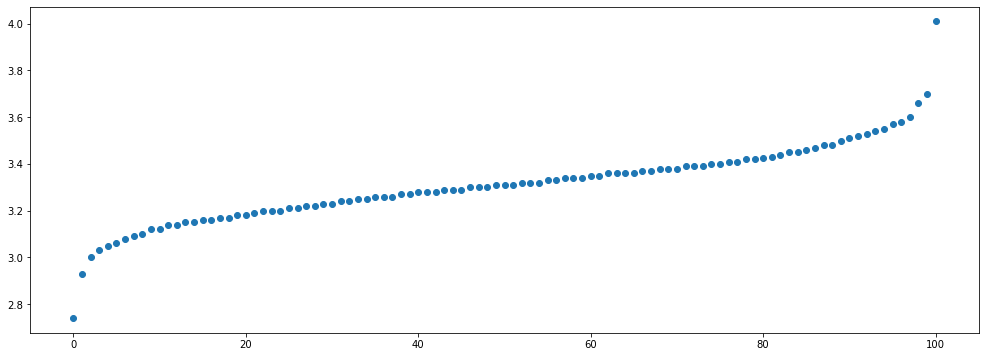

sulphates
[0.33   0.42   0.44   0.45   0.46   0.47   0.48   0.48   0.49   0.49
 0.5    0.5    0.51   0.52   0.52   0.52   0.53   0.53   0.53   0.54
 0.54   0.54   0.54   0.54   0.55   0.55   0.55   0.56   0.56   0.56
 0.564  0.57   0.57   0.57   0.58   0.58   0.58   0.58   0.59   0.59
 0.59   0.6    0.6    0.6    0.6    0.6    0.61   0.61   0.6104 0.62
 0.62   0.62   0.63   0.63   0.63   0.64   0.64   0.64   0.65   0.65
 0.65   0.66   0.66   0.67   0.67   0.67   0.68   0.68   0.69   0.7
 0.7    0.71   0.71   0.72   0.72   0.73   0.74   0.74   0.75   0.76
 0.76   0.77   0.78   0.78   0.79   0.8    0.81   0.82   0.8224 0.84
 0.85   0.86   0.87   0.89   0.91   0.93   0.9708 1.05   1.13   1.2604
 2.    ]


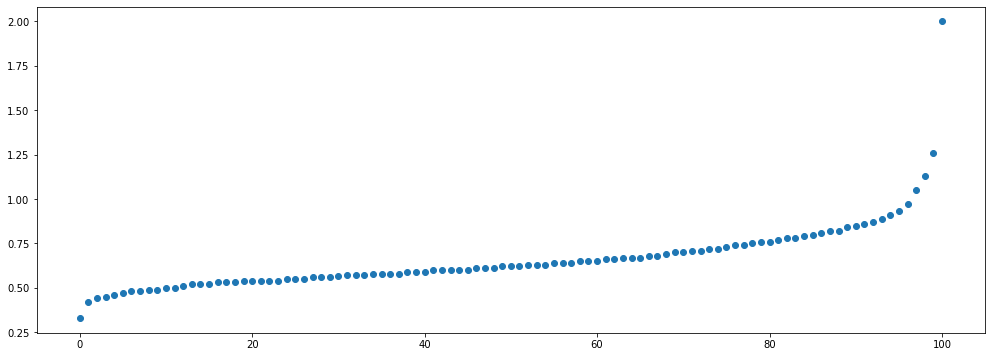

alcohol
[ 8.4    9.     9.     9.1    9.2    9.2    9.2    9.2    9.2    9.3
  9.3    9.3    9.3    9.4    9.4    9.4    9.4    9.4    9.4    9.5
  9.5    9.5    9.5    9.5    9.5    9.5    9.5    9.5    9.6    9.6
  9.6    9.6    9.7    9.7    9.7    9.8    9.8    9.8    9.8    9.8
  9.9    9.9    9.9   10.    10.    10.    10.    10.1   10.1   10.1
 10.2   10.2   10.2   10.3   10.3   10.4   10.4   10.4   10.5   10.5
 10.5   10.5   10.6   10.6   10.7   10.7   10.8   10.8   10.9   10.9
 10.9   11.    11.    11.    11.    11.1   11.1   11.2   11.2   11.3
 11.3   11.4   11.4   11.5   11.5   11.6   11.7   11.8   11.8   11.9
 12.    12.    12.116 12.3   12.4   12.5   12.608 12.8   12.9   13.4
 14.9  ]


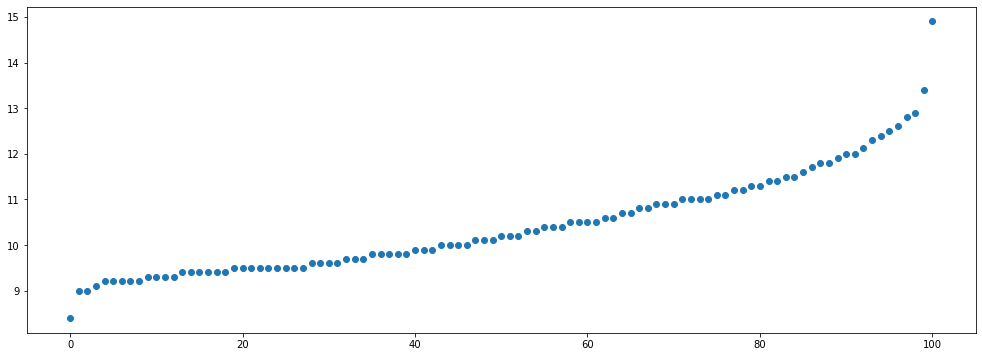

quality
[3. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 8. 8.]


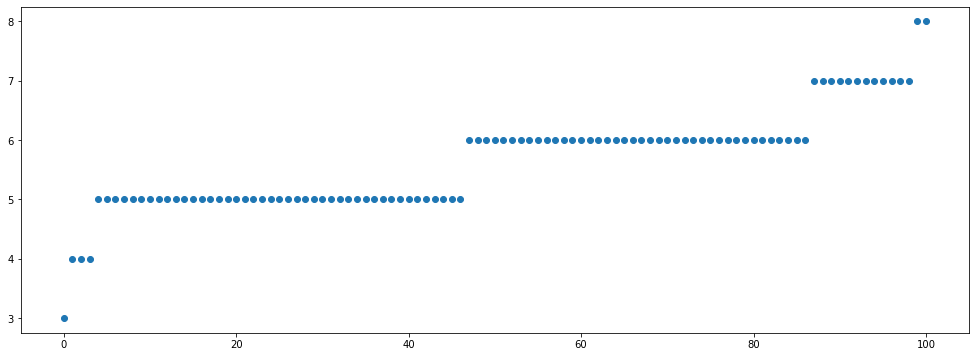

In [8]:
def detect_outlier(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            print(i)
            plt.figure(figsize=(17,6))
            plt.scatter(y=np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)),x = np.arange(0,101,1))
            print(np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)))
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            print(i)
            plt.figure(figsize=(17,6))
            plt.scatter(y=np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)),x = np.arange(0,101,1))
            print(np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)))
            plt.show()
            
detect_outlier(df)

In [9]:
df['fixed acidity'].where(~(df['fixed acidity'] == 15.9), 13.3)
df['volatile acidity'].where(~(df['volatile acidity'] == 1.02), 1.58)
df['citric acid'].where(~(df['citric acid'] == 0.7002), 1.)
df['residual sugar'].where(~(df['residual sugar'] >= 8.306), 6.604)
df['chlorides'].where(~(df.chlorides >= 0.226), 0.17412)
df['free sulfur dioxide'].where(~(df['free sulfur dioxide'] >= 50.02), 42)
df['total sulfur dioxide'].where(~(df['total sulfur dioxide'] == 289), 147)
df['density'].where(~(df['free sulfur dioxide'] == 1.00369), 1.001506)
df['pH'].where(~(df.pH == 4.01), 3.7002)
df['sulphates'].where(~(df.sulphates == 2), 1.2604)
df['alcohol'].where(~(df.alcohol == 14.9), 13.4)

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

# Checking null values

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dividing quality into High and Low

In [11]:
# Now i will convert the quality into low and high categories
l = list(df['quality']) #First storing a feature in a list
new_y = [] #Creating a list to store new converted values
for i in l:
    if(i == 3) or (i == 4) or (i == 5):
        new_y.append('Low') #if the value are 3, 4, 5 then the quality is low
        
    else:
        new_y.append('High') #the quality is high

df['quality'] = new_y
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low


<AxesSubplot:xlabel='quality', ylabel='count'>

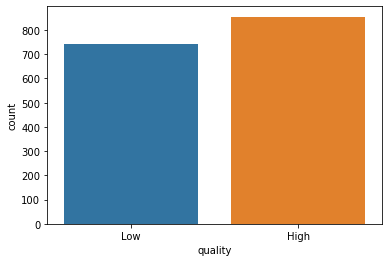

In [12]:
sns.countplot(x = df['quality'])

In [13]:
df['quality'] = np.where(df['quality'] == 'Low', 0, 1)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [15]:
import pickle

pickle.dump('df',open('df.pkl', 'wb'))

In [16]:
(df['quality'].value_counts() / len(df)) * 100

1    53.470919
0    46.529081
Name: quality, dtype: float64

# 4. Splitting Data into Train and Test

In [17]:
x = df.drop('quality', axis=1)
y = df['quality']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

# 5. Let's Build our Models

# 1. Logistic Regression

In [19]:
lr = LogisticRegression(max_iter=15000)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=15000)

In [20]:
lr_pred = lr.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       230
           1       0.76      0.74      0.75       250

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



# 2. Random Forest Classifier

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [22]:
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       230
           1       0.83      0.79      0.81       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



In [23]:
accuracy_score(Y_test, rf_pred)

0.8083333333333333

# 3. Gredient Boosting Classifier

In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [25]:
gb_pred = gb.predict(X_test)
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       230
           1       0.78      0.79      0.78       250

    accuracy                           0.78       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.78      0.77       480



# 4. Stacking Classifier

In [26]:
stack = StackingClassifier([
    ('lr', LogisticRegression(max_iter=15000)),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
], final_estimator=LogisticRegression())
stack.fit(X_train, Y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=15000)),
                               ('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [27]:
stack_pred = stack.predict(X_test)
print(classification_report(Y_test, stack_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       230
           1       0.83      0.80      0.81       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480



In [28]:
accuracy_score(Y_test, stack_pred)

0.8104166666666667

# 5. Voting Classifier

In [29]:
voting = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=15000)),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
], voting='soft')
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=15000)),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [30]:
voting_pred = voting.predict(X_test)
print(classification_report(Y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       230
           1       0.80      0.80      0.80       250

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



# 6. HyperParameter Tuning

In [31]:
n_estimators = [i for i in range(100, 1000, 50)]
min_samples_leaf = [a for a in range(0, 5, 1)]
max_features = ['auto', 'sqrt', 'log2']

grid = {
    'n_estimators' : n_estimators,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features
}

In [ ]:
grid_cv = GridSearchCV(estimator = rf,
                              param_grid = grid,
                              cv=5, 
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=7)

grid_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed: 10.7min


In [ ]:
grid_cv.best_estimator_

In [ ]:
hrf = RandomForestClassifier(n_estimators=800)
hrf.fit(X_train, Y_train)

In [ ]:
hrf_pred = hrf.predict(X_test)
print(classification_report(Y_test, hrf_pred))

In [ ]:
accuracy_score(Y_test, hrf_pred)

After hyperparameter tuning, feature selecton my model accuracy is not increasing

My best model is Stacking Classifier with 82% accuracy